In [57]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import expon

In [58]:
def hat_game(i):
    pieces = list(range(1, i + 1))
    while len(pieces) > 1:
        piece_a, piece_b = random.sample(pieces, 2)
        pieces.remove(piece_a)
        pieces.remove(piece_b)
        pieces.append(abs(piece_a - piece_b))
    return pieces[0]

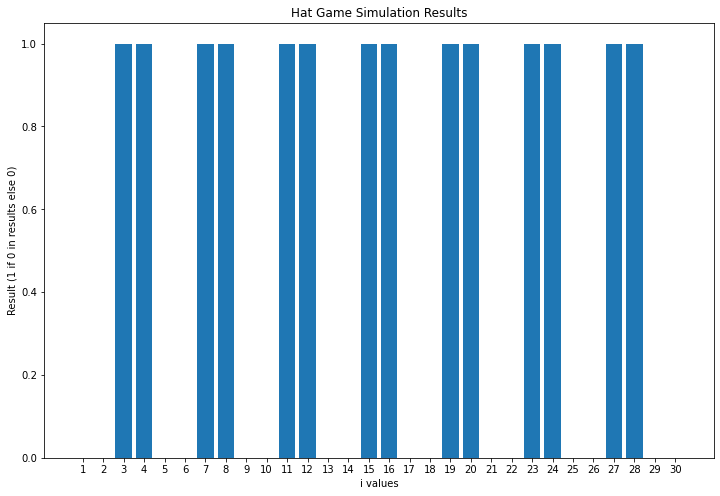

In [59]:
i_vals = range(1, 31)
results_list = []

for i in i_vals:
    results = [hat_game(i) for k in range(30)]
    result_bool = 1 if 0 in results else 0
    results_list.append(result_bool)

plt.figure(figsize = (12, 8))
plt.bar(range(1, len(results_list) + 1), results_list, tick_label = list(i_vals))
plt.xlabel('i values')
plt.ylabel('Result (1 if 0 in results else 0)')
plt.title('Hat Game Simulation Results')
plt.show()

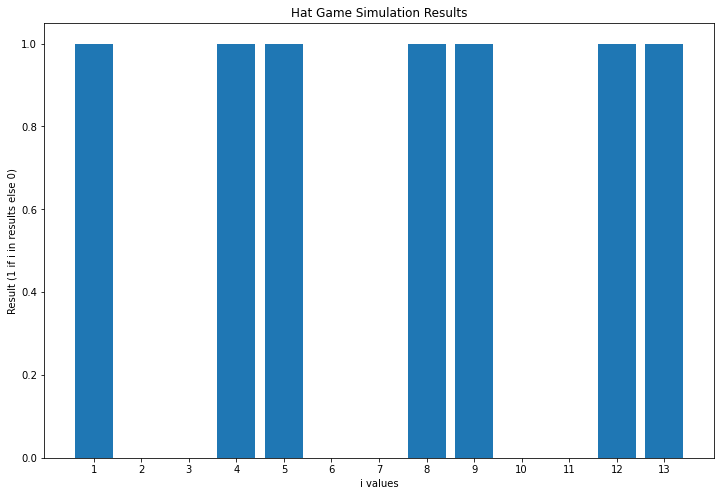

In [65]:
i_vals = range(1, 14)
results_list = []

for i in i_vals:
    results = [hat_game(i) for k in range(200)]
    result_bool = 1 if i in results else 0
    results_list.append(result_bool)

plt.figure(figsize=(12, 8))
plt.bar(range(1, len(results_list) + 1), results_list, tick_label = list(i_vals))
plt.xlabel('i values')
plt.ylabel('Result (1 if i in results else 0)')
plt.title('Hat Game Simulation Results')
plt.show()

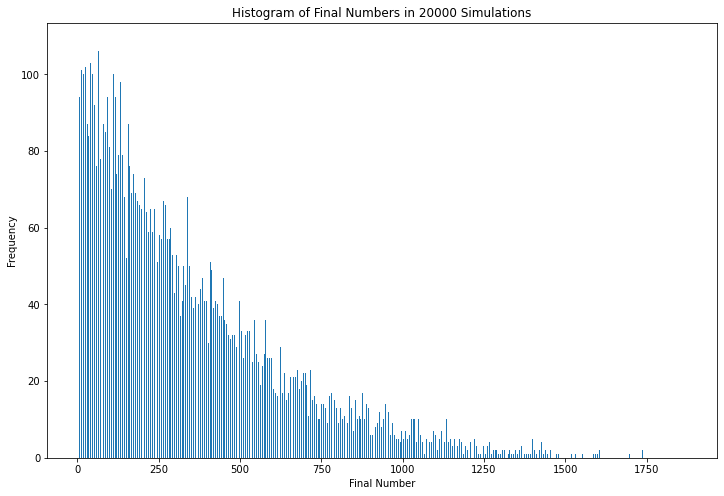

In [62]:
def hat_game_n(i, n):
    final_numbers = []
    for k in range(n):
        result = hat_game(i)
        final_numbers.append(result)
    return final_numbers

final_numbers = hat_game_n(2024, 20000)
plt.figure(figsize = (12, 8))
plt.hist(final_numbers, bins = range(1, max(final_numbers) + 1))
plt.title(f'Histogram of Final Numbers in 20000 Simulations')
plt.xlabel('Final Number')
plt.ylabel('Frequency')
plt.show()

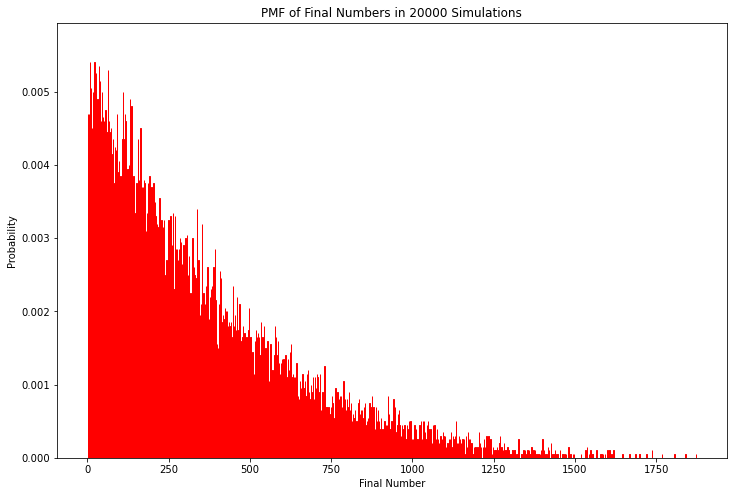

In [63]:
freqs = [final_numbers.count(x) for x in range(1, max(final_numbers) + 1)]
probs = [freq / 20000 for freq in freqs]
plt.figure(figsize = (12, 8))
plt.bar(range(1, max(final_numbers) + 1), probs, width = 1.0, edgecolor = 'red')
plt.title(f'PMF of Final Numbers in 20000 Simulations')
plt.xlabel('Final Number')
plt.ylabel('Probability')
plt.ylim(0, max(probs) * 1.1)
plt.show()

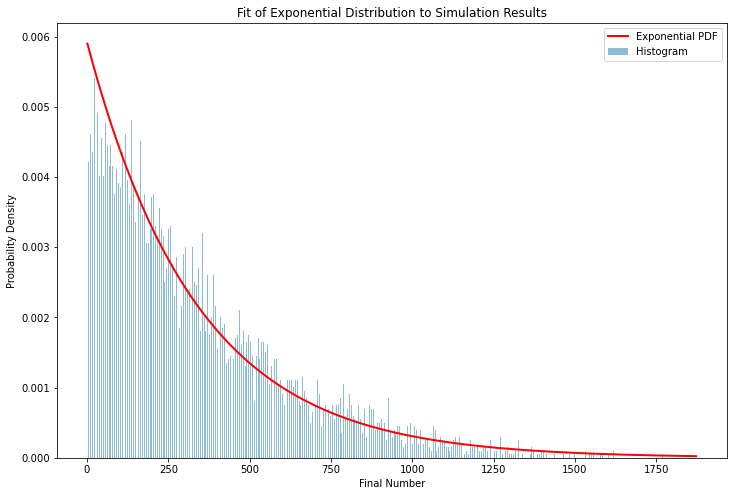

In [66]:
x = np.linspace(1, max(final_numbers), 1000)
y = 2 * (expon.pdf(x_values, scale = np.mean(final_numbers)))
plt.figure(figsize = (12, 8))
plt.hist(final_numbers, bins = range(1, max(final_numbers) + 1), density = True, alpha = 0.5, label = 'Histogram')
plt.plot(x, y, 'r-', lw = 2, label = 'Exponential PDF')
plt.legend()
plt.title('Fit of Exponential Distribution to Simulation Results')
plt.xlabel('Final Number')
plt.ylabel('Probability Density')
plt.show()